# HW2
## 在本次任务中，我们需要测试不同滤波器的作用

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

image_path = '../images'
image1 = cv2.imread(os.path.join(image_path, 'scenery1.jpg'), flags=1)
image2 = cv2.imread(os.path.join(image_path, 'scenery2.jpg'), flags=1)
image3 = cv2.imread(os.path.join(image_path, 'scenery3.jpg'), flags=1)
image = cv2.imread(os.path.join(image_path, 'pet.jpg'), cv2.IMREAD_GRAYSCALE)

# 转化为RGB格式
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def show(imgs, name, cmap='gray'):
    l = len(imgs)
    fig = plt.figure()
    for index in range(l):
        ax = fig.add_subplot(1, l, index+1)
        ax.imshow(imgs[index], cmap=cmap)
        ax.set_title(name[index])
        ax.axis('off')
    plt.show()

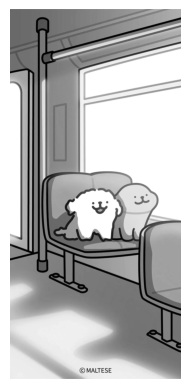

In [9]:
# 展示
# fig = plt.figure()
# ax1 = fig.add_subplot(131)
# ax1.imshow(image1)
# ax1.axis('off')

# ax2 = fig.add_subplot(132)
# ax2.imshow(image2)
# ax2.axis('off')

# ax3 = fig.add_subplot(133)
# ax3.imshow(image3)
# ax3.axis('off')
# plt.show()

plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

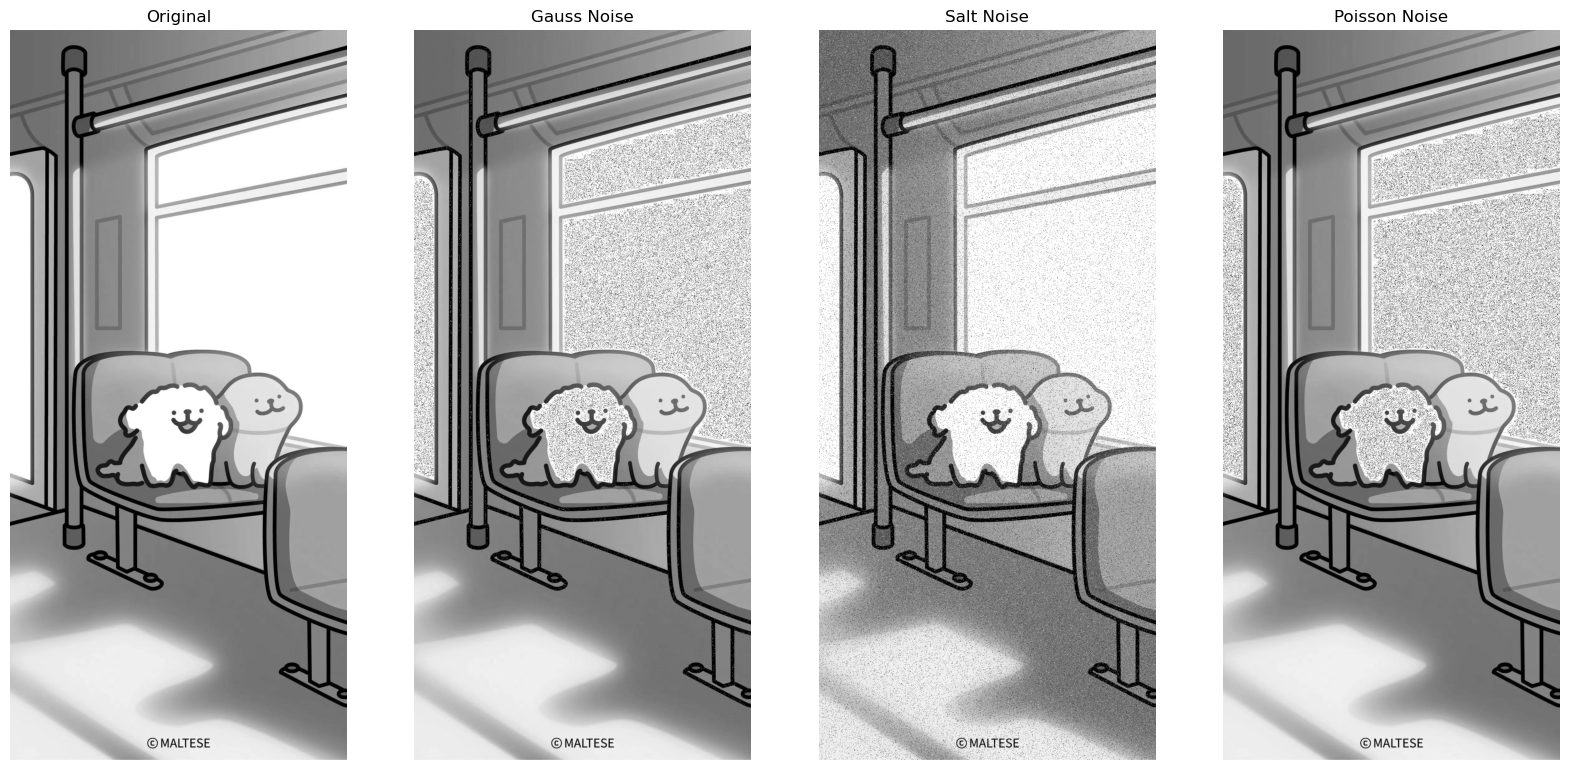

In [6]:
# 下面添加高斯噪声
def gauss(img, mean=0, sigma=1):
    h, w = img.shape

    gauss = np.random.normal(mean,sigma,(h,w))
    return (img + gauss).astype('uint8')


def pepper_and_salt(img,percentage=0.08):
    num=int(percentage*img.shape[0]*img.shape[1])#  椒盐噪声点数量
    img2=img.copy()
    for i in range(num):
        X=random.randint(0,img2.shape[0]-1)#从0到图像长度之间的一个随机整数,因为是闭区间所以-1
        Y=random.randint(0,img2.shape[1]-1)
        if random.randint(0,1) ==0: #黑白色概率55开
            img2[X,Y] = 255#白色
        else:
            img2[X,Y] = 0#黑色
    return img2

def poisson(img, lamda=0.2):
    noise_type = np.random.poisson(lam=lamda,size=img.shape).astype(dtype='uint8') 
    return noise_type+img  


gauss_img = gauss(image)
salt_img = pepper_and_salt(image)
poisson_img = poisson(image)

img = [image, gauss_img, salt_img, poisson_img]
name = ['Original', 'Gauss Noise', 'Salt Noise', 'Poisson Noise']

fig = plt.figure(figsize=(20,20))
for index in range(4):
    ax = fig.add_subplot(1,4,index+1)
    ax.set_title(name[index])
    ax.axis('off')
    ax.imshow(img[index],cmap='gray')
plt.show()

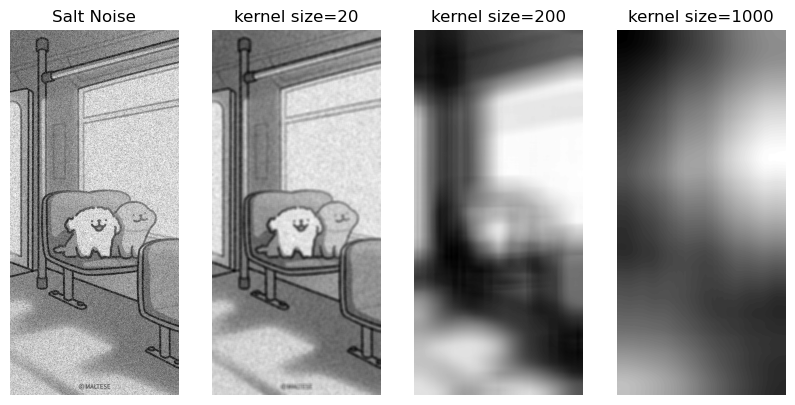

In [17]:
# 平滑滤波
def avg_filter(img, kernel_size):
    return cv2.blur(img, (kernel_size, kernel_size))


def gauss_filter(img, sigma, kernel_size=51):
    return cv2.GaussianBlur(img,(kernel_size, kernel_size), sigma)
    
filter = avg_filter

img = salt_img
img_1 = filter(salt_img, 20)
img_2 = filter(salt_img, 200)
img_3 = filter(salt_img, 1000)

titles = ['Salt Noise', 'kernel size=20', 'kernel size=200', 'kernel size=1000']  
images = [img, img_1, img_2, img_3]
fig = plt.figure(figsize=(10,10))  
for i in range(4):
    ax = fig.add_subplot(1,4,i+1)
    ax.imshow(images[i], cmap='gray')  
    ax.set_title(titles[i])  
    ax.axis('off')

plt.show()  


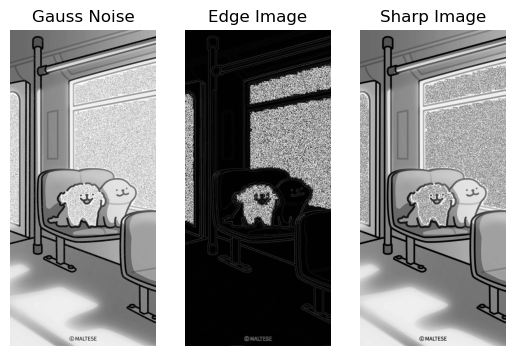

In [10]:
def laplacian_sharpen(image, k=-0.3):
    # 计算拉普拉斯图像
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    # 增强图像
    sharpened = cv2.addWeighted(image, 1, laplacian, k, 0)
    return laplacian, sharpened

img = poisson_img
edge, sharpen = laplacian_sharpen(img)


imgs = [gauss_img, edge, sharpen]
name = ['Gauss Noise', 'Edge Image', 'Sharp Image']
fig = plt.figure()
for index in range(3):
    ax = fig.add_subplot(1, 3, index+1)
    ax.imshow(imgs[index], cmap='gray')
    ax.set_title(name[index])
    ax.axis('off')
plt.show()


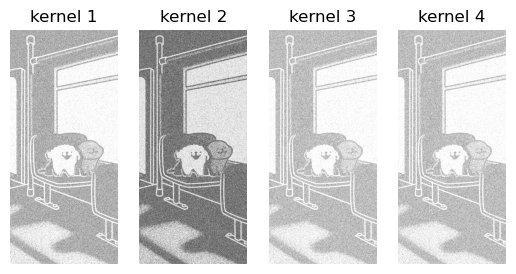

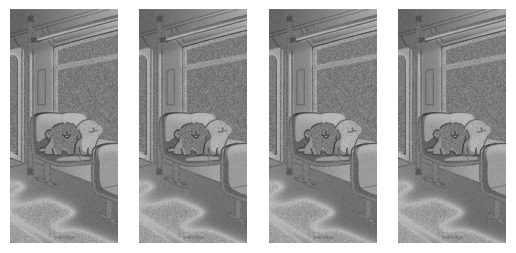

In [60]:
# 手动设定卷积核
def custom_laplacian(image, kernel, k=-0.04):
    edge = cv2.filter2D(image, cv2.CV_64F, kernel)
    edge = cv2.convertScaleAbs(edge)
    sharpen = cv2.addWeighted(image, 1, edge, k, 0)
    return edge, sharpen

k1 =  np.array([[1, 1, 1],
                [1, -8, 1],
                [1, 1, 1]])
k2 =  np.array([[0, 1, 0],
               [1, -4, 1],
               [0, 1, 0]])
k3 =  np.array([[1, 2, 1],
               [1, -10, 1],
               [1, 2, 1]])
k4 =  np.array([[1, 1, 1],
               [2, -10, 2],
               [1, 1, 1]])
k5 =  np.array([[1, 1, 1],
               [2, -10, 2],
               [1, 1, 1]])
img = gauss_img
e1, s1 = custom_laplacian(img, k1)
e2, s2 = custom_laplacian(img, k2)
e3, s3 = custom_laplacian(img, k3)
e4, s4 = custom_laplacian(img, k4)
e5, s5 = custom_laplacian(img, k5)

imgs = [e1, e2, e3, e4]
name = ['kernel 1', 'kernel 2', 'kernel 3', 'kernel 4', 'kernel 5']
show(imgs, name)
imgs = [s1, s2, s3, s4]
name = ['' for _ in range(4)]
show(imgs, name)


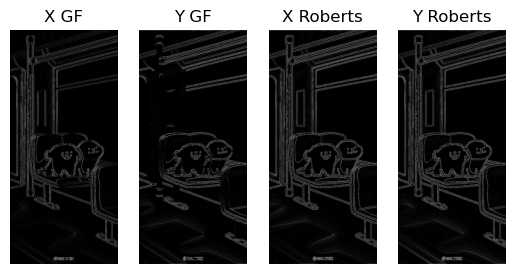

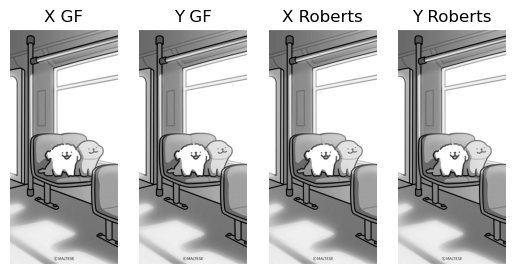

In [70]:
# 尝试不同锐化滤波器
def sharpen(image, kernel, k=0.4):
    edge = cv2.filter2D(image, cv2.CV_64F, kernel)
    edge = cv2.convertScaleAbs(edge)
    sharpen = cv2.addWeighted(image, 1, edge, k, 0)
    return edge, sharpen

k1 = np.array([
    [0,0,0],
    [0,1,-1],
    [0,0,0],
])
k2 = np.array([
    [0,0,0],
    [0,1,0],
    [0,-1,0],
])
k3 = np.array([
    [0,0,0],
    [0,1,0],
    [0,0,-1],
])
k4 = np.array([
    [0,0,0],
    [0,0,1],
    [0,-1,0],
])
img = image
e1, s1 = sharpen(img, k1)
e2, s2 = sharpen(img, k2)
e3, s3 = sharpen(img, k3)
e4, s4 = sharpen(img, k4)


imgs = [e1*10, e2*10, e3*10, e4*10]
name = ['X GF', 'Y GF', 'X Roberts', 'Y Roberts']
show(imgs, name)
imgs = [s1, s2, s3, s4]
# name = ['' for _ in range(4)]
show(imgs, name)

In [87]:

# 接下来使用频域转换
def fft_numpy(item, opt=1):
    """
    用numpy对图像进行傅里叶变换
    """
    if opt:
        # 傅里叶变换
        img = item
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        amp = np.log(np.abs(fshift))
        phase = np.angle(fshift)
        return amp, phase, fshift
    else:
        # 傅里叶逆变换
        fshift = item
        ishift = np.fft.ifftshift(fshift)
        iimg = np.fft.ifft2(ishift)
        iimg = np.abs(iimg)
        return iimg
    
    
    


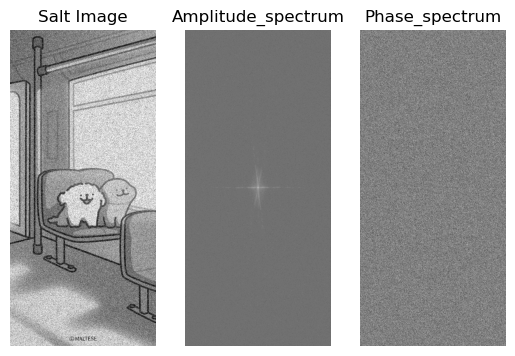

In [83]:
img = salt_img
amp, phase, fshift = fft_numpy(img,opt=1)
imgs = [img, amp, phase]
name = ['Salt Image', 'Amplitude_spectrum', 'Phase_spectrum']
fig = plt.figure()
for index in range(len(imgs)):
    ax = fig.add_subplot(1, len(imgs), index+1)
    ax.imshow(imgs[index], cmap='gray')
    ax.set_title(name[index])
    ax.axis('off')
plt.show()


In [91]:
def create_ideal_lowpass_mask(shape, D0):
    """
    创建理想低通滤波掩膜
    :param shape: 掩膜的形状 (rows, cols)
    :param D0: 截止频率
    :return: 掩膜矩阵
    """
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2  # 中心点
    
    # 创建网格
    x = np.arange(0, cols)
    y = np.arange(0, rows)
    X, Y = np.meshgrid(x, y)
    
    # 计算距离中心的距离
    distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    
    # 创建掩膜：距离小于等于D0为1，其余为0
    mask = np.zeros((rows, cols), dtype=np.float32)
    mask[distance <= D0] = 1
    return mask

def create_ideal_highpass_mask(shape, D0):
    """
    创建理想低通滤波掩膜
    :param shape: 掩膜的形状 (rows, cols)
    :param D0: 截止频率
    :return: 掩膜矩阵
    """
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2  # 中心点
    
    # 创建网格
    x = np.arange(0, cols)
    y = np.arange(0, rows)
    X, Y = np.meshgrid(x, y)
    
    # 计算距离中心的距离
    distance = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    
    # 创建掩膜：距离小于等于D0为1，其余为0
    mask = np.zeros((rows, cols), dtype=np.float32)
    mask[distance >= D0] = 1
    return mask

def apply_ideal_lowpass_filter(fshift, D0):
    """
    应用理想低通滤波器
    :param fshift: 频域图像
    :param D0: 截止频率
    :return: 过滤后的频域图像
    """
    mask = create_ideal_lowpass_mask(fshift.shape, D0)
    # 应用掩膜
    fshift_filtered = fshift * mask
    return fshift_filtered, mask

def apply_ideal_highpass_filter(fshift, D0):
    """
    应用理想低通滤波器
    :param fshift: 频域图像
    :param D0: 截止频率
    :return: 过滤后的频域图像
    """
    mask = create_ideal_highpass_mask(fshift.shape, D0)
    # 应用掩膜
    fshift_filtered = fshift * mask
    return fshift_filtered, mask

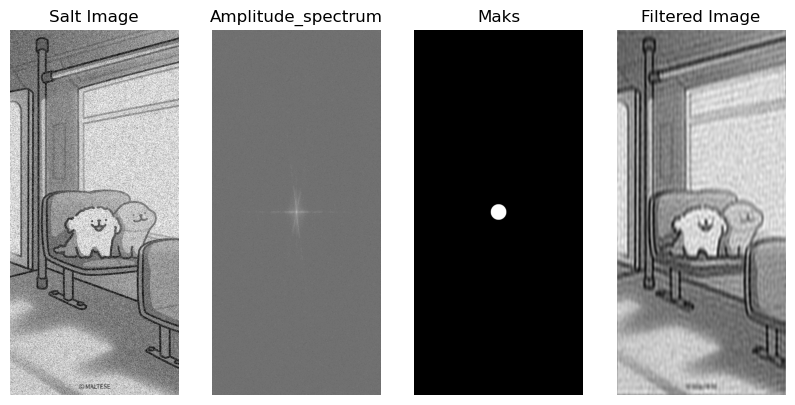

In [92]:
# 应用低通滤波器
img = salt_img
amp, phase, fshift = fft_numpy(img,opt=1)
fshift_filter, mask = apply_ideal_lowpass_filter(fshift, D0=50)
img_filter = fft_numpy(fshift_filter, opt=0)

imgs = [img, amp, mask, img_filter]
name = ['Salt Image', 'Amplitude_spectrum', 'Maks','Filtered Image']
fig = plt.figure(figsize=(10,10))
for index in range(len(imgs)):
    ax = fig.add_subplot(1, len(imgs), index+1)
    ax.imshow(imgs[index], cmap='gray')
    ax.set_title(name[index])
    ax.axis('off')
plt.show()

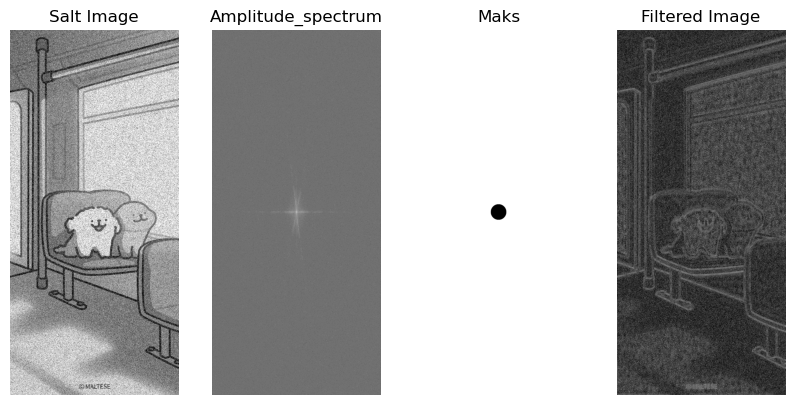

In [93]:
# 应用高通滤波器
img = salt_img
amp, phase, fshift = fft_numpy(img,opt=1)
fshift_filter, mask = apply_ideal_highpass_filter(fshift, D0=50)
img_filter = fft_numpy(fshift_filter, opt=0)

imgs = [img, amp, mask, img_filter]
name = ['Salt Image', 'Amplitude_spectrum', 'Maks','Filtered Image']
fig = plt.figure(figsize=(10,10))
for index in range(len(imgs)):
    ax = fig.add_subplot(1, len(imgs), index+1)
    ax.imshow(imgs[index], cmap='gray')
    ax.set_title(name[index])
    ax.axis('off')
plt.show()